In [2]:
import pandas as pd
import seaborn as sns


data = pd.read_csv('CaseCompetitionData.csv', sep=',')
data.head(5)

,insert_num,purchase_make,purchase_model,purchase_vehicle_year,purchase_price,trade_in,vehicle_financing,customer_age,customer_income,customer_gender,customer_previous_purchase,customer_distance_to_dealer,post_purchase_satisfaction,vehicle_warranty_used,subsequent_purchases
0,81690,DODGE,CHARGER,2010,10001 - 15000,0,0,21 - 30,20001 - 40000,U,0,9,?,1,0
1,109994,FORD,EXPLORER SPORT TRAC,2007,15001 - 20000,0,1,61 - 70,20001 - 40000,M,1,15,?,0,0
2,11399,BMW,328,2010,20001 - 25000,1,1,31 - 40,80001 - 100000,F,1,18,?,0,9
3,360305,VOLVO,S40,2008,15001 - 20000,1,0,41 - 50,?,M,0,4,?,0,1
4,36685,CHEVROLET,CRUZE,2012,10001 - 15000,1,1,21 - 30,40001 - 60000,M,0,2,?,0,0


In [3]:
print(data.isna().sum()) # checks to see if there are any null records
print(data['subsequent_purchases'].unique()) # used this to check variable types in the rows => found '?'in 4
print(len(data)) # len of data set
# checking out missing data with conditionals
print(len(data.loc[(data['purchase_price'] !='?') & (data['customer_income'] != '?') & (data['customer_distance_to_dealer'] != '?')])) 
print(len(data.loc[data['post_purchase_satisfaction'] != '?'])) #satisfaction survey is a small group of non null

insert_num                     0
purchase_make                  0
purchase_model                 0
purchase_vehicle_year          0
purchase_price                 0
trade_in                       0
vehicle_financing              0
customer_age                   0
customer_income                0
customer_gender                0
customer_previous_purchase     0
customer_distance_to_dealer    0
post_purchase_satisfaction     0
vehicle_warranty_used          0
subsequent_purchases           0
dtype: int64
[ 0  9  1  2  4  3  7  8  5 10  6]
361559
307870
1219


   subsequent_purchases  insert_num
0                     0      238004
1                     1       98861
2                     2       10363
3                     3        3855
4                     4        3173
AxesSubplot(0.125,0.125;0.775x0.755)
   percent_total  subsequent_purchases
0      65.827154                     0
1      27.342979                     1
2       2.866199                     2
3       1.066216                     3
4       0.877588                     4
5       0.563394                     5
6       0.296494                     6
7       0.300919                     7
8       0.284877                     8
9       0.302302                     9


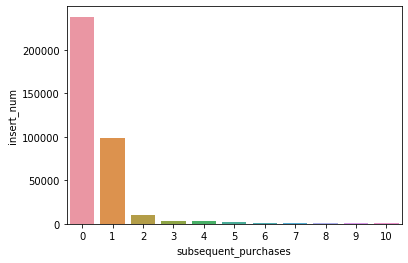

In [4]:
# reset index lets you create new data frame keeping the column names
sub_pur = data.groupby('subsequent_purchases')['insert_num'].count().to_frame().reset_index()  
print(sub_pur.head())
ax = sns.barplot(x='subsequent_purchases', y='insert_num', data=sub_pur) # seeing subsequent purchase distribution
print(ax)
total = len(data['insert_num'])
sub_pur['percent_total'] = sub_pur['insert_num']/total*100
print(sub_pur[['percent_total', 'subsequent_purchases']].head(10)) # looking at it in tabel format
# this also shows us that we are looking at a moderately unbalanced problem with roughly 34% being true positives

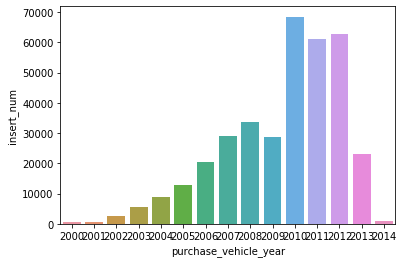

In [13]:
#sns.violinplot(x=data['purchase_vehicle_year']) # simple check of what year people are buying cars (remember its 2013)
year_parsed = data[data['purchase_vehicle_year'] >= 2000] # parsing to get a closer look at distribution
year_parsed = year_parsed.groupby('purchase_vehicle_year')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='purchase_vehicle_year', y='insert_num', data=year_parsed)
#2010-2012 hold vast majority of purchases

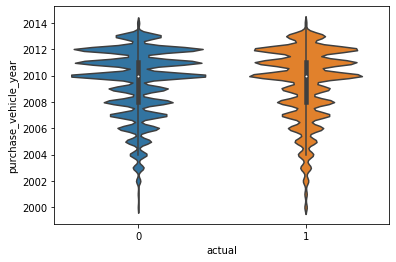

In [16]:
data['actual'] = 1
data.loc[data['subsequent_purchases'] == 0, 'actual'] = 0 # creating a label that will be used later in machine learning
subs = data.loc[data['purchase_vehicle_year'] >= 2000]
sns.violinplot(x=subs['actual'], y=subs['purchase_vehicle_year']) # checking distribution of car year models against whether they are repeat customers
#looks like a rather similar distribution so this might not be entirely too telling

,purchase_price,insert_num
0,0 - 5000,4425
1,10001 - 15000,101301
2,15001 - 20000,118303
3,20001 - 25000,66408
4,25001 - 30000,32352
5,30001 - 35000,15274
6,35001 - 40000,7276
7,40001 - 45000,3061
8,45001 - 50000,1577
9,50001 - 55000,681


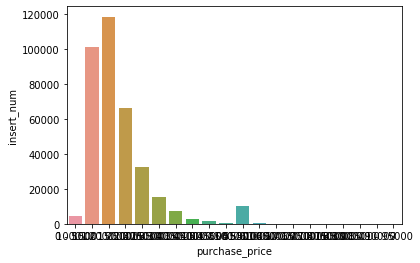

In [15]:
price_count = data.groupby('purchase_price')['insert_num'].count().to_frame().reset_index()
sns.barplot(x='purchase_price', y='insert_num', data=price_count)
price_count
#most cars in 10,000 - 35,000 range, makes sense

360405
  customer_age  actual
0       0 - 20    6343
1         101+    1311
2      21 - 30   84906
3      31 - 40   89749
4      41 - 50   85678
5      51 - 60   55469
6      61 - 70   26325
7      71 - 80    8217
8      81 - 90    2243
9     91 - 100     164


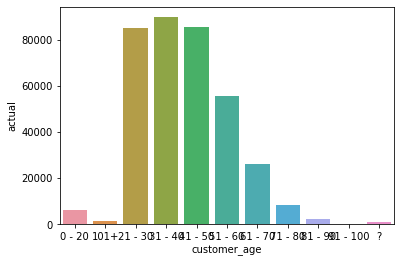

In [110]:
print(len(data[data['customer_age'] != '?'])) # only a couple people have unknown ages
age_counts = data.groupby('customer_age')['actual'].count().to_frame().reset_index()
print(age_counts.head(10))
sns.barplot(x='customer_age', y='actual', data=age_counts)

,customer_age,actual
0,0 - 20,0.364654
1,101+,0.447750
2,21 - 30,0.338410
3,31 - 40,0.335046
4,41 - 50,0.347510


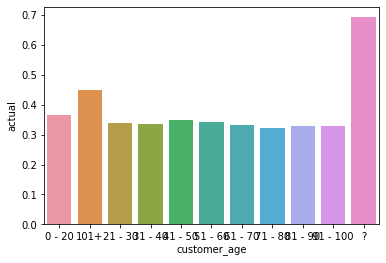

In [18]:
age_buckets = data.groupby('customer_age')['actual'].mean().to_frame().reset_index()
sns.barplot(x='customer_age', y='actual', data=age_buckets)
#interesting that 101+ stands out as a higher liklihood to be a repeat
age_buckets.head()

In [19]:
data_2 = data.loc[data['post_purchase_satisfaction'] != '?'] 
data_2['post_purchase_satisfaction'] = pd.to_numeric(data_2['post_purchase_satisfaction'])
prefs_count = data_2.groupby('post_purchase_satisfaction')['insert_num'].count().to_frame().reset_index()
prefs_count['post_purchase_satisfaction'] = pd.to_numeric(prefs_count['post_purchase_satisfaction'])
prefs_count = prefs_count.append({'post_purchase_satisfaction' : 2 , 'insert_num' : 0} , ignore_index=True)
prefs_count.sort_values(by=['post_purchase_satisfaction'], ascending=True, inplace=True)
print(prefs_count.head(11))

prefs_0 = data_2.loc[data['actual'] == 0].groupby('post_purchase_satisfaction')['insert_num'].count().to_frame().reset_index()
prefs_1 = data_2.loc[data['actual'] == 1].groupby('post_purchase_satisfaction')['insert_num'].count().to_frame().reset_index()
prefs_1 = prefs_1.append({'post_purchase_satisfaction' : 1 , 'insert_num' : 0} , ignore_index=True)
prefs_0 = prefs_0.append({'post_purchase_satisfaction' : 2 , 'insert_num' : 0} , ignore_index=True)
prefs_1 = prefs_1.append({'post_purchase_satisfaction' : 2 , 'insert_num' : 0} , ignore_index=True)
for num in range(0:10):
    if perfs_1[]
#print(prefs_0)
print(prefs_0)
print(prefs_1)
print(prefs_count)

    post_purchase_satisfaction  insert_num
0                            0          12
1                            1           1
10                           2           0
2                            3           5
3                            4           6
4                            5          12
5                            6          13
6                            7          34
7                            8          94
8                            9         223
9                           10         819
    post_purchase_satisfaction  insert_num
0                            0           7
1                            1           1
10                           2           0
2                            3           2
3                            4           2
4                            5          10
5                            6           7
6                            7          26
7                            8          66
8                            9         149
9          

C:\Users\999Na\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
